# Sprint 3

Short summary of this week's checkpoints.

## Completed and tested the ETL script
We have pretty much completed the ETL script except for the verbosity and the UI of the script when running on terminal which are still in discussion.

## Curated merchant dataset

Metrics includes:
- **Tags**: Specifying the categories/industry of the merchants products <br><br>

- **Average Daily Revenue**: Average earnings from merchant per day
$$\text{Average Daily Revenue}=\frac{\text{Total revenue}}{\text{Number of days in the transaction data}}$$
<br>
- **Average Daily Order Count**: Average number of orders per day
$$\text{Average Daily Order Count}=\frac{\text{Total number of order}}{\text{Number of days in the transaction data}}$$
<br>
- **Average Value per Order**: Average number of orders per day
$$\text{Average Value per Order}=\frac{\text{Total revenue}}{\text{Total number of orders}}$$
<br>
- **Revenue Level**: Alphabetical order representation of the level of revenue bands
$$\text{Revenue Level}\in\{a,b,c,d,e\}$$
<br>
- **Average Daily Commission**: Average daily commission that BNPL firm receives if 100\% of the merchants' transaction is paid through the BNPL's platform
$$\text{Average Daily Commission}=\text{Average Daily Revenue}\times\text{Take rate}$$
<br>
- **Average Commission per Order**: Average commission that BNPL firm receives per order from the merchant
$$\text{Average Commission per Order}=\text{Average Value per Order}\times\text{Take rate}$$
<br>
- **Number of Sales Region**: Number of SA2 region that the merchant sells to.
<br>
- **Average Weekly Income of Consumer Base**: Average weekly income of the consumer base for the merchant. This indirectly tells us the repayability of the target consumers.
<br>
- **Number of VIP/Frequent Customers**: Refers to number of frequent customer. Full derivation of the "VIP" standard is in the following [section](#Deriving-Merchant's-VIP-Customer).

## Overview of the Curated Data

## Deriving Number of Sales Region

To count the number of merchant's sales region, we first map consumer data to their respective SA2 code based on their postcode. While mapping, we found that there are certain postcodes with multiple SA2 code and therefore the consumer is mapped to multiple different SA2 code.

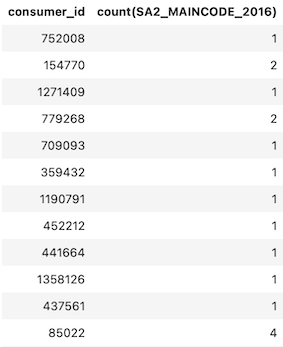


For `Number of Sales Region` metric, this would not be a concern. However, for `Average Weekly Income of Consumer Base`, we decided to take the average weekly income among the SA2 regions.

We end up with the following tables
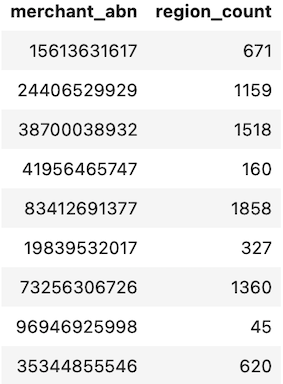

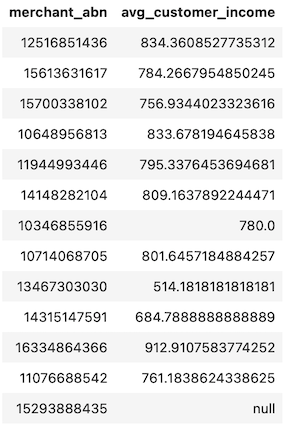

There are certain SA2 region where the ABS dataset does not have the weekly income information for. We are looking to impute the weekly income for these regions as they represent a small portion of the data.

## Deriving Merchant's VIP/Frequent Customer

### For each consumer (user_id), which merchants and how many times did they visit?
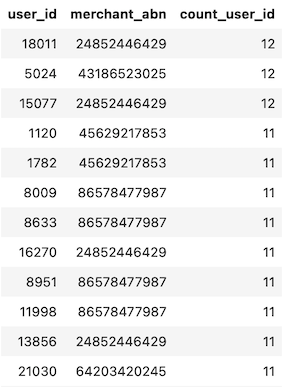

We first curate a table that shows which customer visited which merchants for how many times. For example, user_id 5024 visited 43186523025 merchant for 12 times.

### What is the distribution of visited number of consumers (count_user_id)?
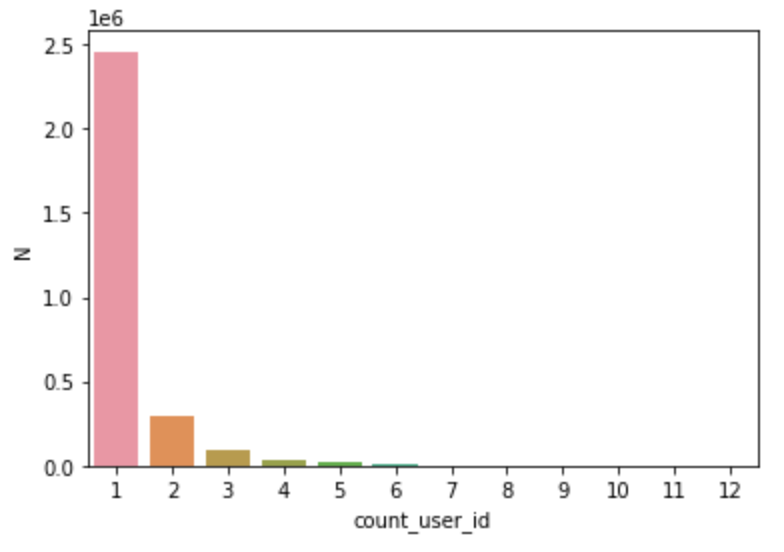

A quick visualization shows that the number of repeating visits is highly skewed. The skewness of the distribution and the nature of the "count" data seem to approximate to a Poisson distribution.

As of now, we are using the following method to find the threshold for "VIP" standard.

$$\text{Threshold} = \text{Average Number of User Visits} + 2 \times \text{Standard Deviation of User Visits}$$

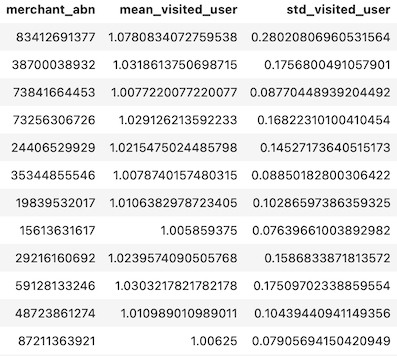

After filtering the number of frequent customer based on the **Threshold**, we have 
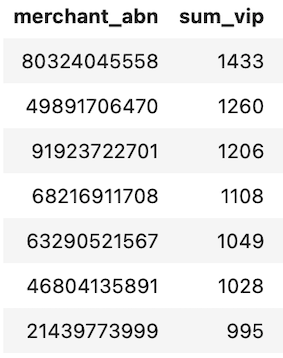

We are still experimenting with the threshold. Due to the highly skewed distribution, we may opt for using quantile instead of standard deviation in the Threshold calculation.

## Fraud Data Analysis

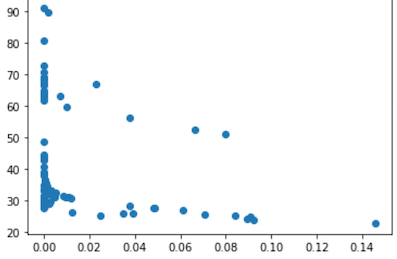

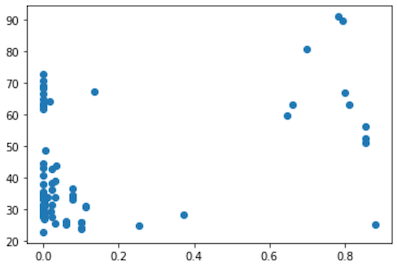